# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats.weightstats as ssw
%matplotlib inline
import numpy as np

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# Распределение Парето

pareto_sv = sts.pareto(b=2.62)
sample = pareto_sv.rvs(100)
sample

array([1.23150148, 1.03250048, 1.19218426, 1.02808923, 1.49604523,
       1.23399491, 1.93432748, 1.49990469, 1.43159859, 1.64966125,
       1.76131653, 1.14401564, 1.25940151, 1.38425362, 1.11180303,
       1.21061832, 1.29725388, 1.49995523, 1.22251904, 1.0397622 ,
       1.93216849, 1.68145559, 1.21377395, 1.12230773, 1.52614692,
       1.69740936, 1.3502331 , 1.24848096, 1.47410275, 1.16174334,
       1.73807482, 1.76343968, 1.82502287, 1.59296265, 1.32070919,
       3.16317343, 1.08501958, 1.0204449 , 3.47531791, 2.39836326,
       1.07054601, 1.91417899, 1.60490114, 3.8797656 , 5.59830948,
       1.07965749, 1.65280934, 1.68205487, 1.76476106, 1.69277824,
       1.02807424, 3.33387683, 1.08392157, 1.05993007, 1.40172131,
       1.32320815, 1.53758978, 1.1791961 , 1.0502422 , 1.21315663,
       2.34309085, 2.03694861, 1.20188061, 2.020891  , 2.00992352,
       1.09312148, 1.10521624, 2.17113809, 1.13208662, 1.08885299,
       1.19490864, 2.32946129, 1.10012376, 1.18157601, 1.50400

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = pareto_sv.mean() # настоящее среднее случайной величины
real_mean

1.6172839506172838

In [5]:
real_var = pareto_sv.var() # настоящая дисперсия случайной величины
real_var

1.6101990746886534

### Постройте гистограмму выборки и теоретическую плотность распределения

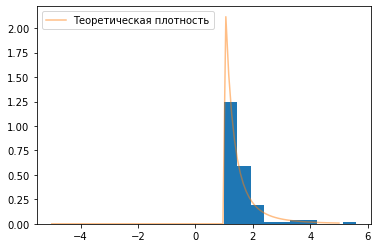

In [6]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-5,5,100)
pdf = pareto_sv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.5677624146251536
0.4984247108129642


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

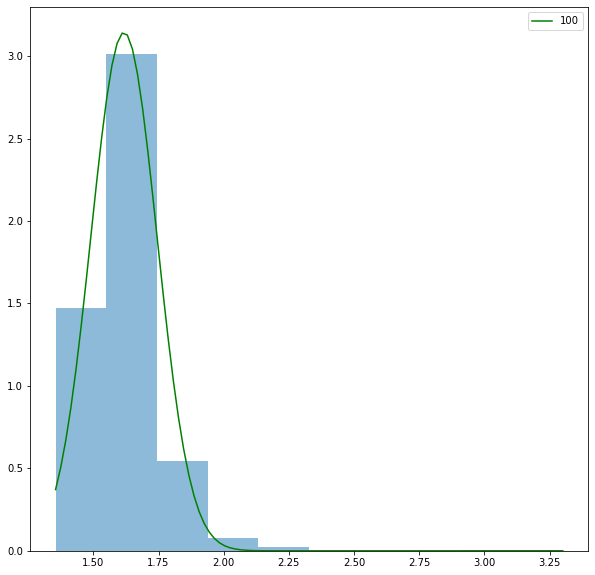

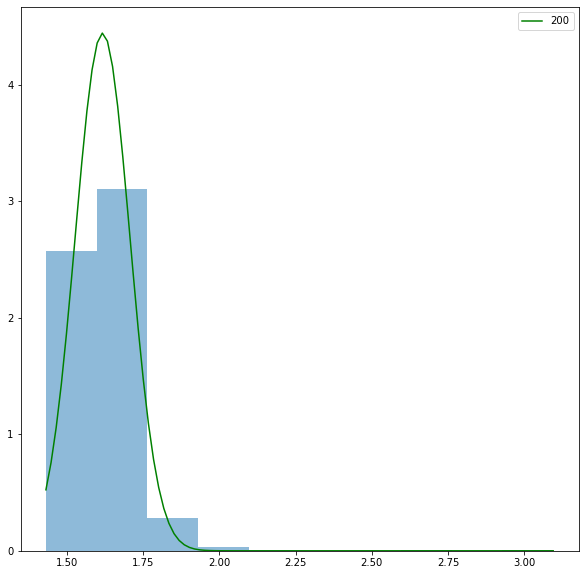

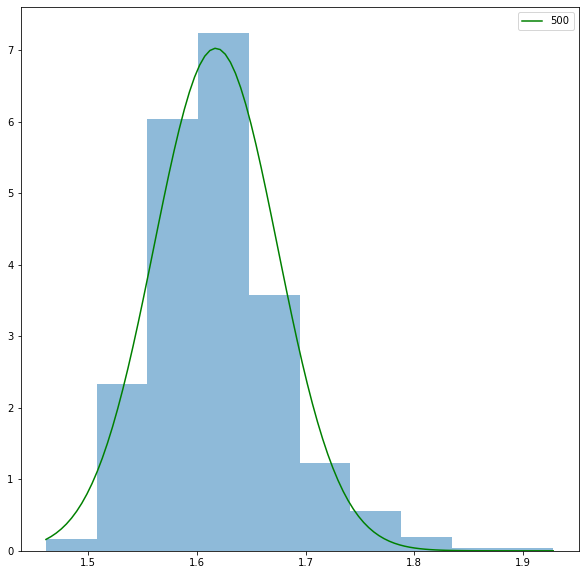

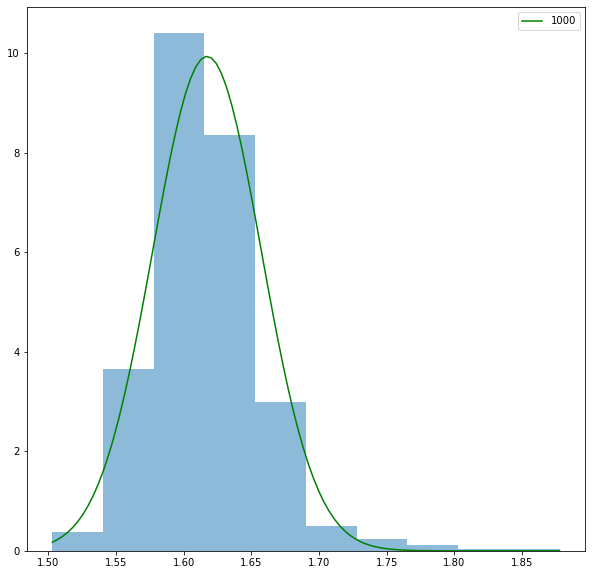

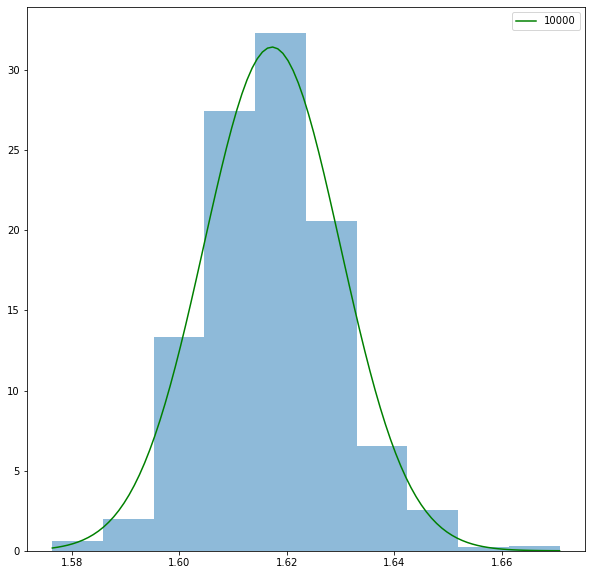

In [8]:
for N in [100, 200, 500, 1000, 10000]:
    means = []
    
    for i in range(1000):
        means.append(np.mean(pareto_sv.rvs(N)))
    
    plt.figure(figsize=(10, 10))
    plt.hist(means, density=True, alpha=0.5)

    norm_dist = sts.norm(loc=real_mean, scale=pareto_sv.std() / np.sqrt(N))
    x = np.linspace(np.min(means), np.max(means), 100)

    pdf = norm_dist.pdf(x)
    plt.plot(x, pdf, label = N, alpha=1, color="green")
    plt.legend()
    plt.plot()

Для данного распределения апроксимация выборочного среднего работает хорошо.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [9]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [10]:
# Создадим списки количества звоноков в день у оставшихся клиентов и у ушедших

left = df.loc[df['churn'] == True]['total day calls'].tolist()
stay = df.loc[df['churn'] == False]['total day calls'].tolist()

In [11]:
# Доверительные интервалы, если известна дисперсия

def interval_left(data):
    left = np.mean(data) - 1.96 * np.sqrt(np.var(data)/len(data))
    return(left)

def interval_right(data):
    right = np.mean(data) + 1.96 * np.sqrt(np.var(data)/len(data))
    return(right)

In [12]:
# Доверительные интервалы методом _zconfint_generic

def interval_z(data):
    z = ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
    return(z)


In [13]:
# Доверительные интервалы для оставшихся клиентов

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    interval_left(stay),interval_right(stay))
    )

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    interval_z(stay))
    )

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.55630252675442, 101.01001326271927] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274126, 101.52482464673243) 


In [14]:
# Доверительные интервалы для ушедших клиентов

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    interval_left(left),interval_right(left))
    )

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    interval_z(left))
    )

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.41262047786196, 103.2581869755542] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


Доверительные интервалы пересекаются. Количество звонков в день нельзя использовать, как критерий определения возможного ухода клиента.